In [1]:
import scipy.io
import numpy as np
import sys
sys.path.append("..")
print(sys.path)
from utils import load_files, get_rdms, get_rdm, mean_albef
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import glob
import imageio
import torch
%load_ext autoreload
%autoreload 2

['/Users/sebastian/University/Bachelor/Thesis/ba-thesis/RDMs', '/Users/sebastian/miniforge3/envs/brain-cv/lib/python39.zip', '/Users/sebastian/miniforge3/envs/brain-cv/lib/python3.9', '/Users/sebastian/miniforge3/envs/brain-cv/lib/python3.9/lib-dynload', '', '/Users/sebastian/miniforge3/envs/brain-cv/lib/python3.9/site-packages', '..']


In [2]:
def plot_rdms(axs, data):
    for i, x in enumerate(zip(data.keys(), data.values(), axs.flat)):
        k = x[0]
        v = x[1]
        ax = x[2]
        sns.heatmap(v, ax=ax, cmap='plasma')
        ax.set_title(k, fontsize=30, fontweight='bold')

In [3]:
albef_img = load_files("albef_feats/img")
albef_img = albef_img.reshape(12, 810, int(622080/810))
albef_txt = load_files("albef_feats/txt")
albef_txt = albef_txt.reshape(6, 810, int(622080/810))
albef_multi = load_files("albef_feats/multi")
albef_multi = albef_multi.reshape(6, 810, int(622080/810))

mean_albef_img_layers = mean_albef(albef_img, "Image")
mean_albef_txt_layers = mean_albef(albef_txt, "Text")
mean_albef_multi_layers = mean_albef(albef_multi, "Multi")

salbef_img_rdms = get_rdms(mean_albef_img_layers)
salbef_txt_rdms = get_rdms(mean_albef_txt_layers)
salbef_multi_rdms = get_rdms(mean_albef_multi_layers)

In [4]:
albef_random_img = load_files("albef_feats_randomized/img")
albef_random_img = albef_random_img.reshape(12, 810, int(622080/810))
albef_random_txt = load_files("albef_feats_randomized/txt")
albef_random_txt = albef_random_txt.reshape(6, 810, int(622080/810))
albef_random_multi = load_files("albef_feats_randomized/multi")
albef_random_multi = albef_random_multi.reshape(6, 810, int(622080/810))

mean_albef_random_img_layers = mean_albef(albef_random_img, "Random Image")
mean_albef_random_txt_layers = mean_albef(albef_random_txt, "Random Text")
mean_albef_random_multi_layers = mean_albef(albef_random_multi, "Random Multi")

salbef_random_img_rdms = get_rdms(mean_albef_random_img_layers)
salbef_random_txt_rdms = get_rdms(mean_albef_random_txt_layers)
salbef_random_multi_rdms = get_rdms(mean_albef_random_multi_layers)

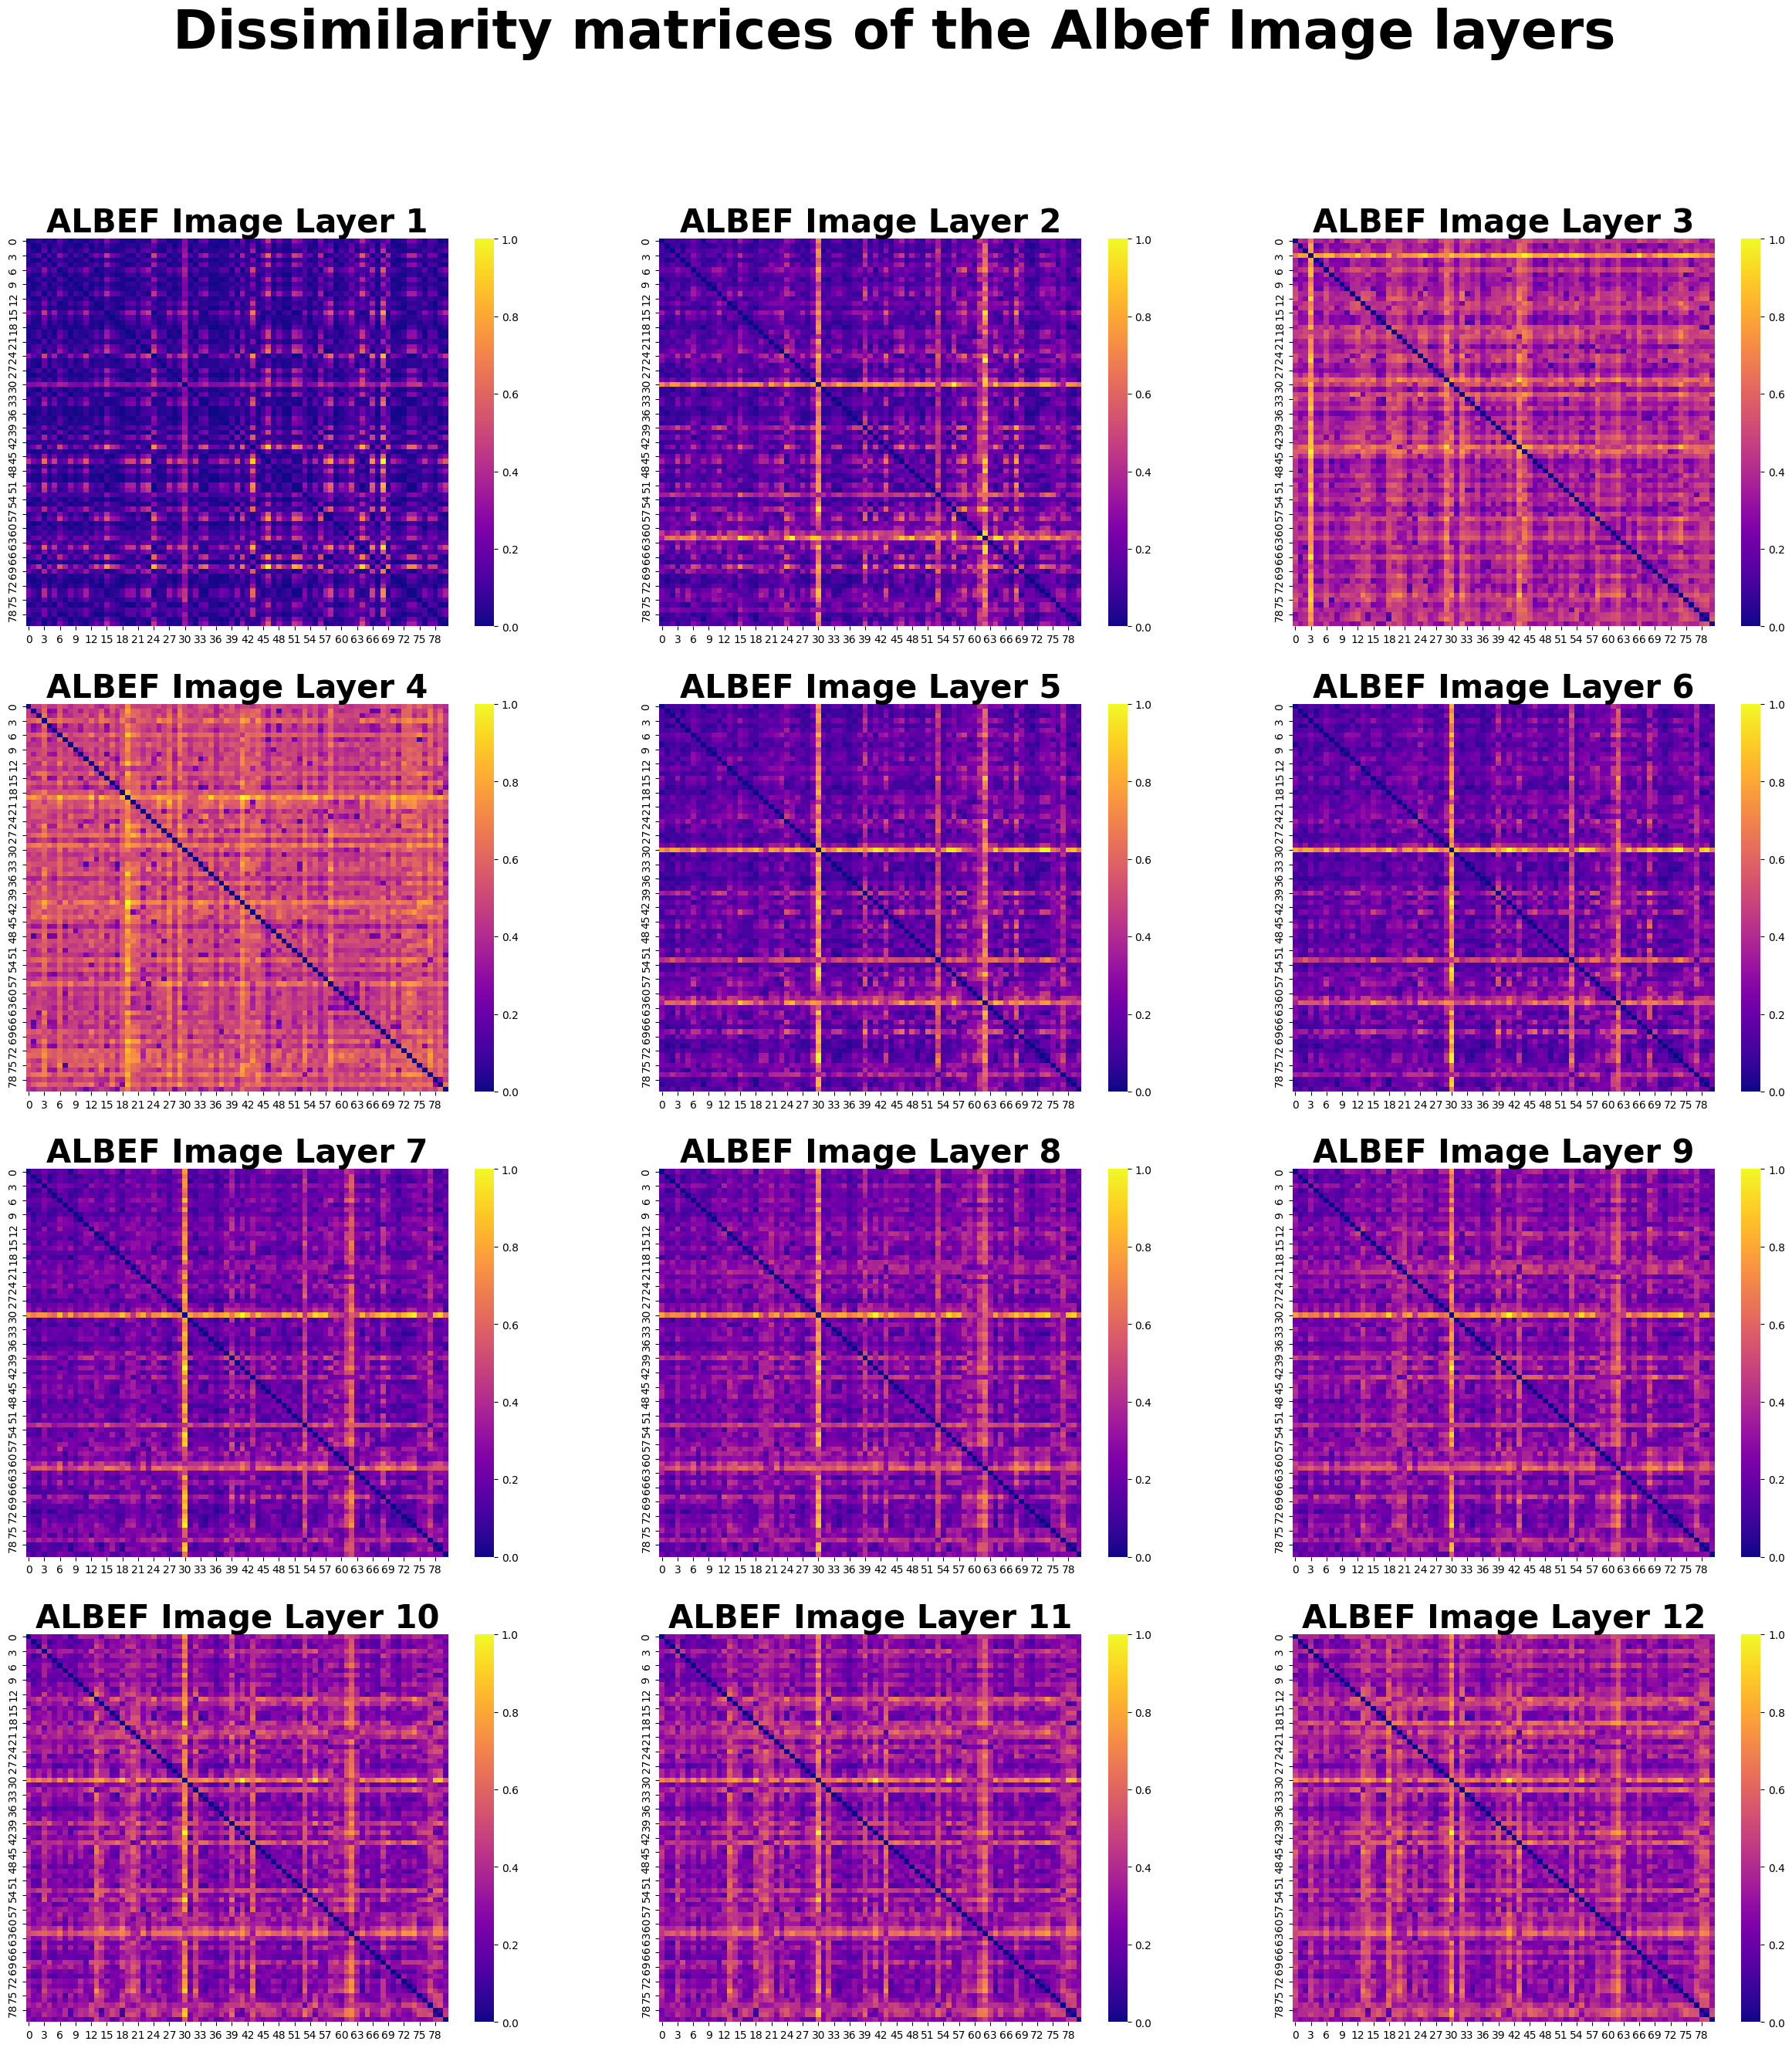

In [5]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30,30))
fig.suptitle('Dissimilarity matrices of the Albef Image layers', fontsize=50, fontweight='bold')


plot_rdms(axs, salbef_img_rdms)

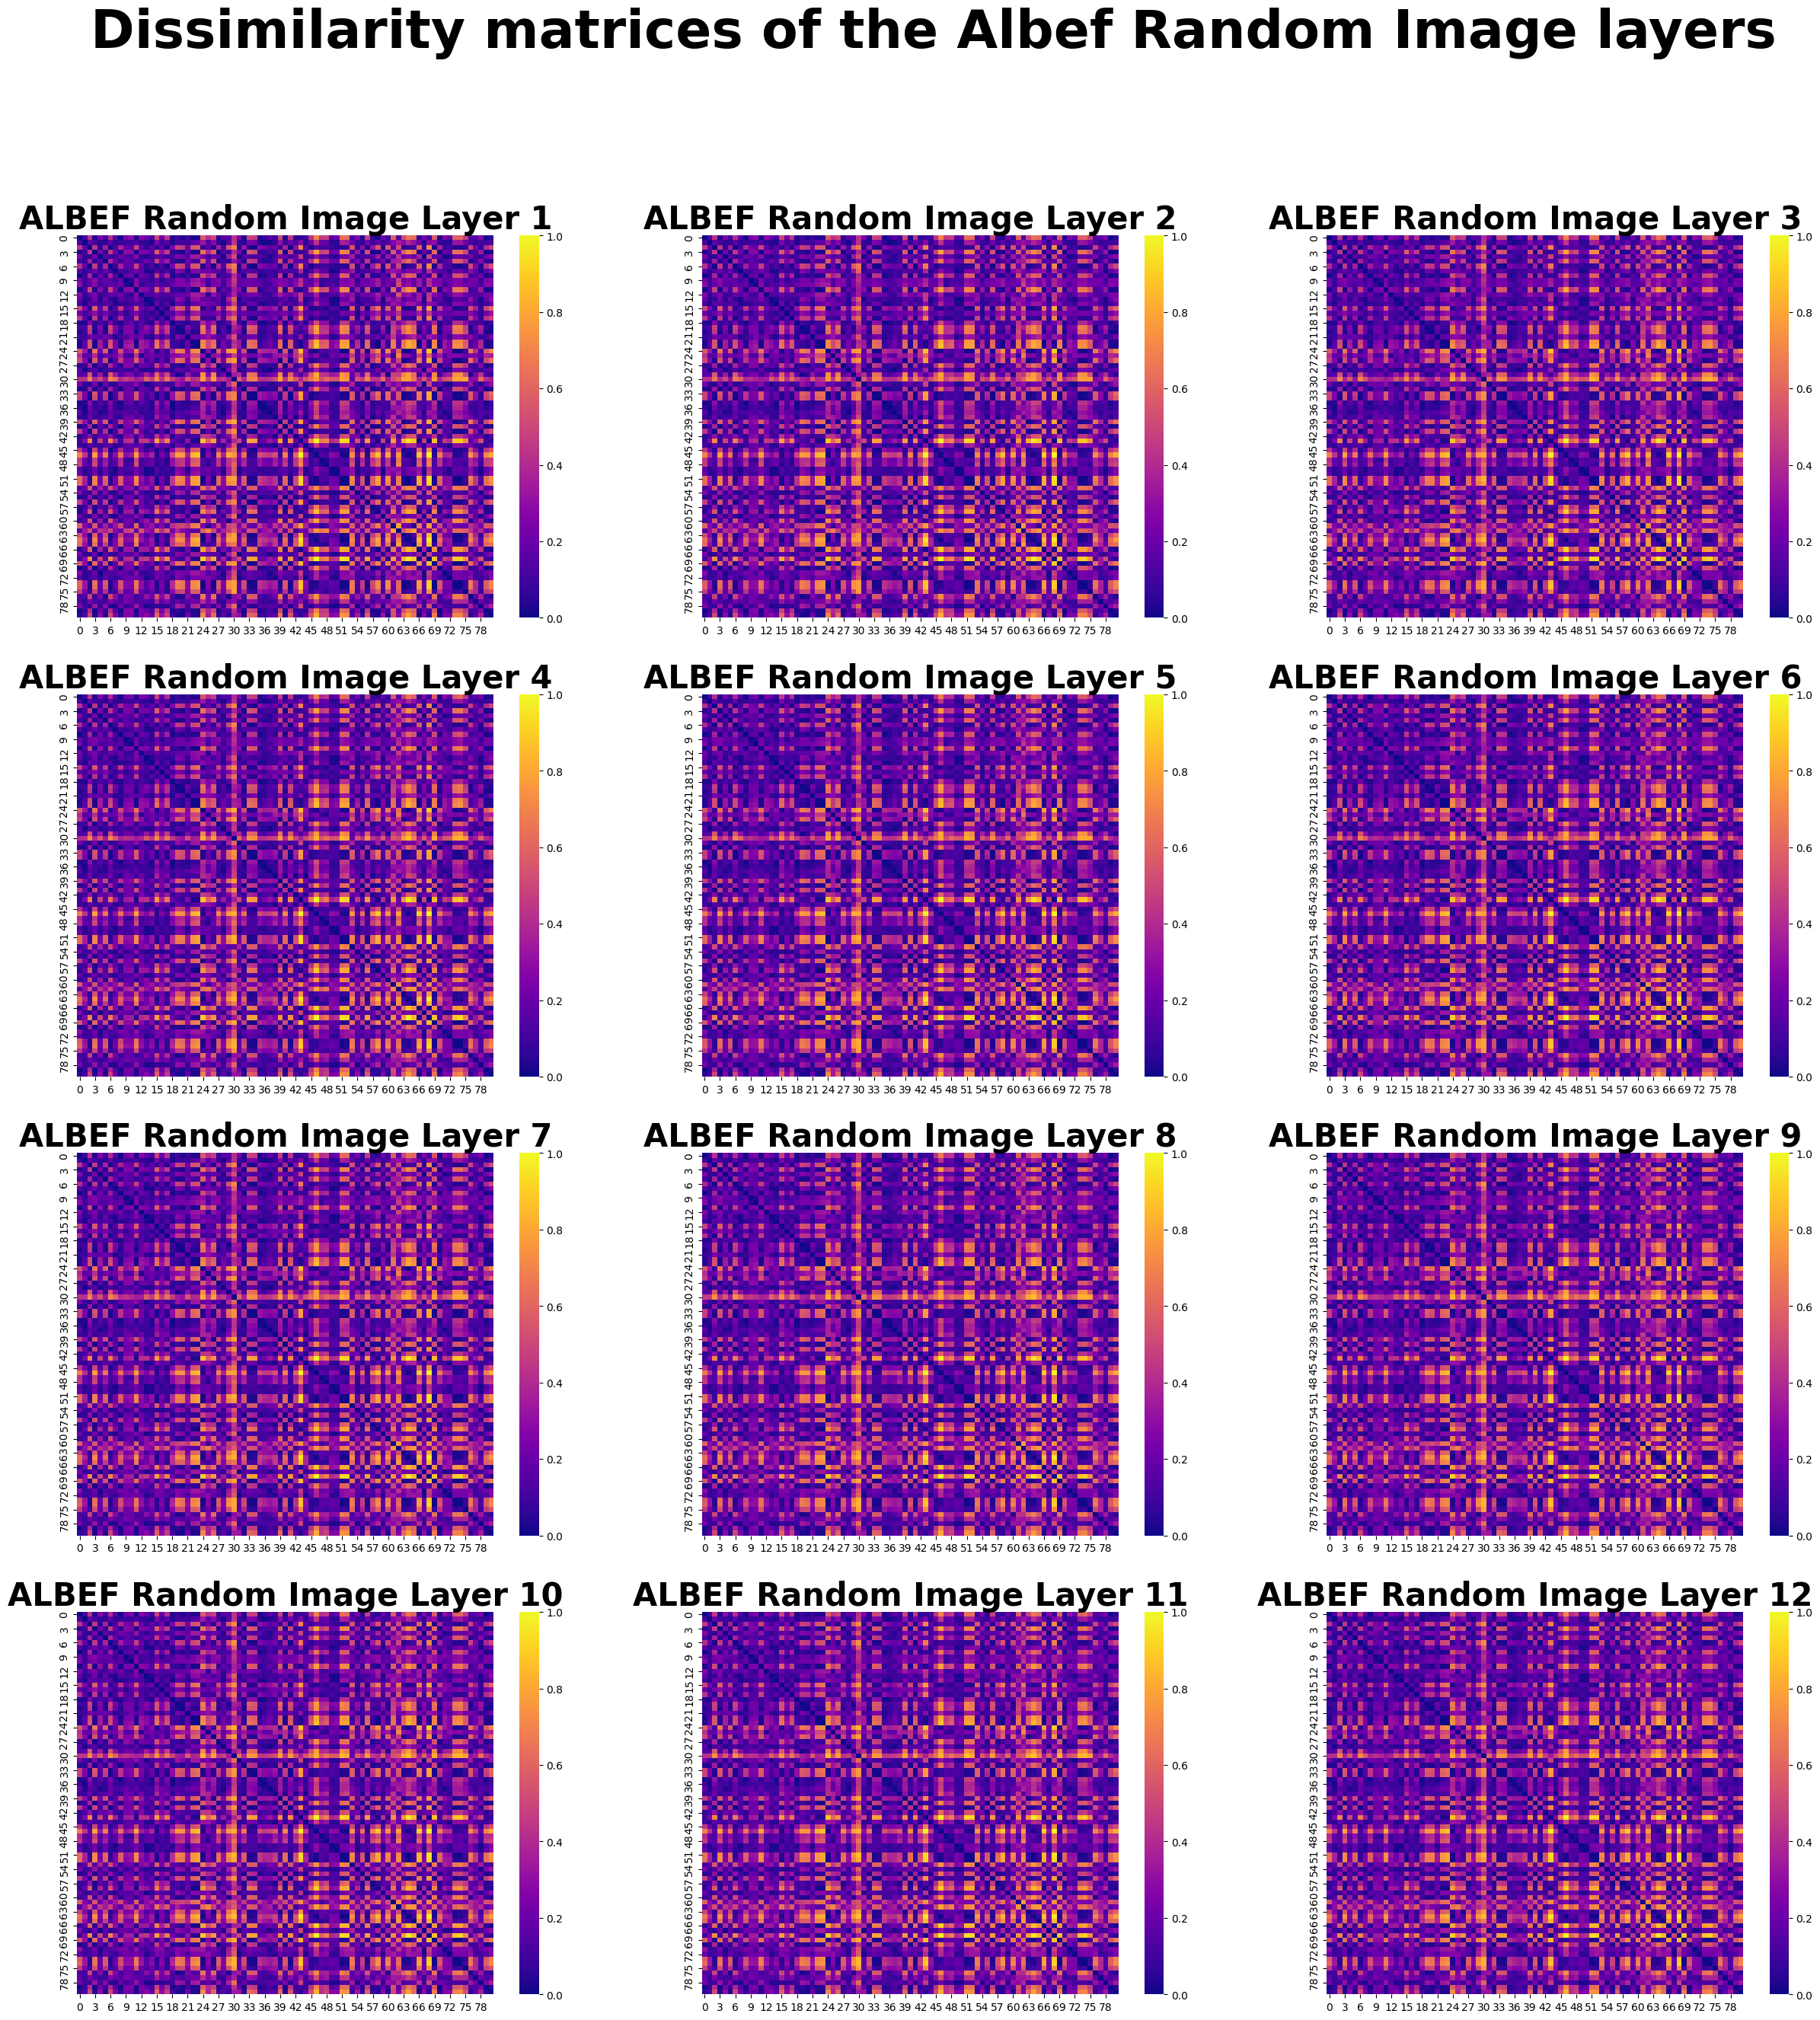

In [6]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30,30))
fig.suptitle('Dissimilarity matrices of the Albef Random Image layers', fontsize=50, fontweight='bold')


plot_rdms(axs, salbef_random_img_rdms)

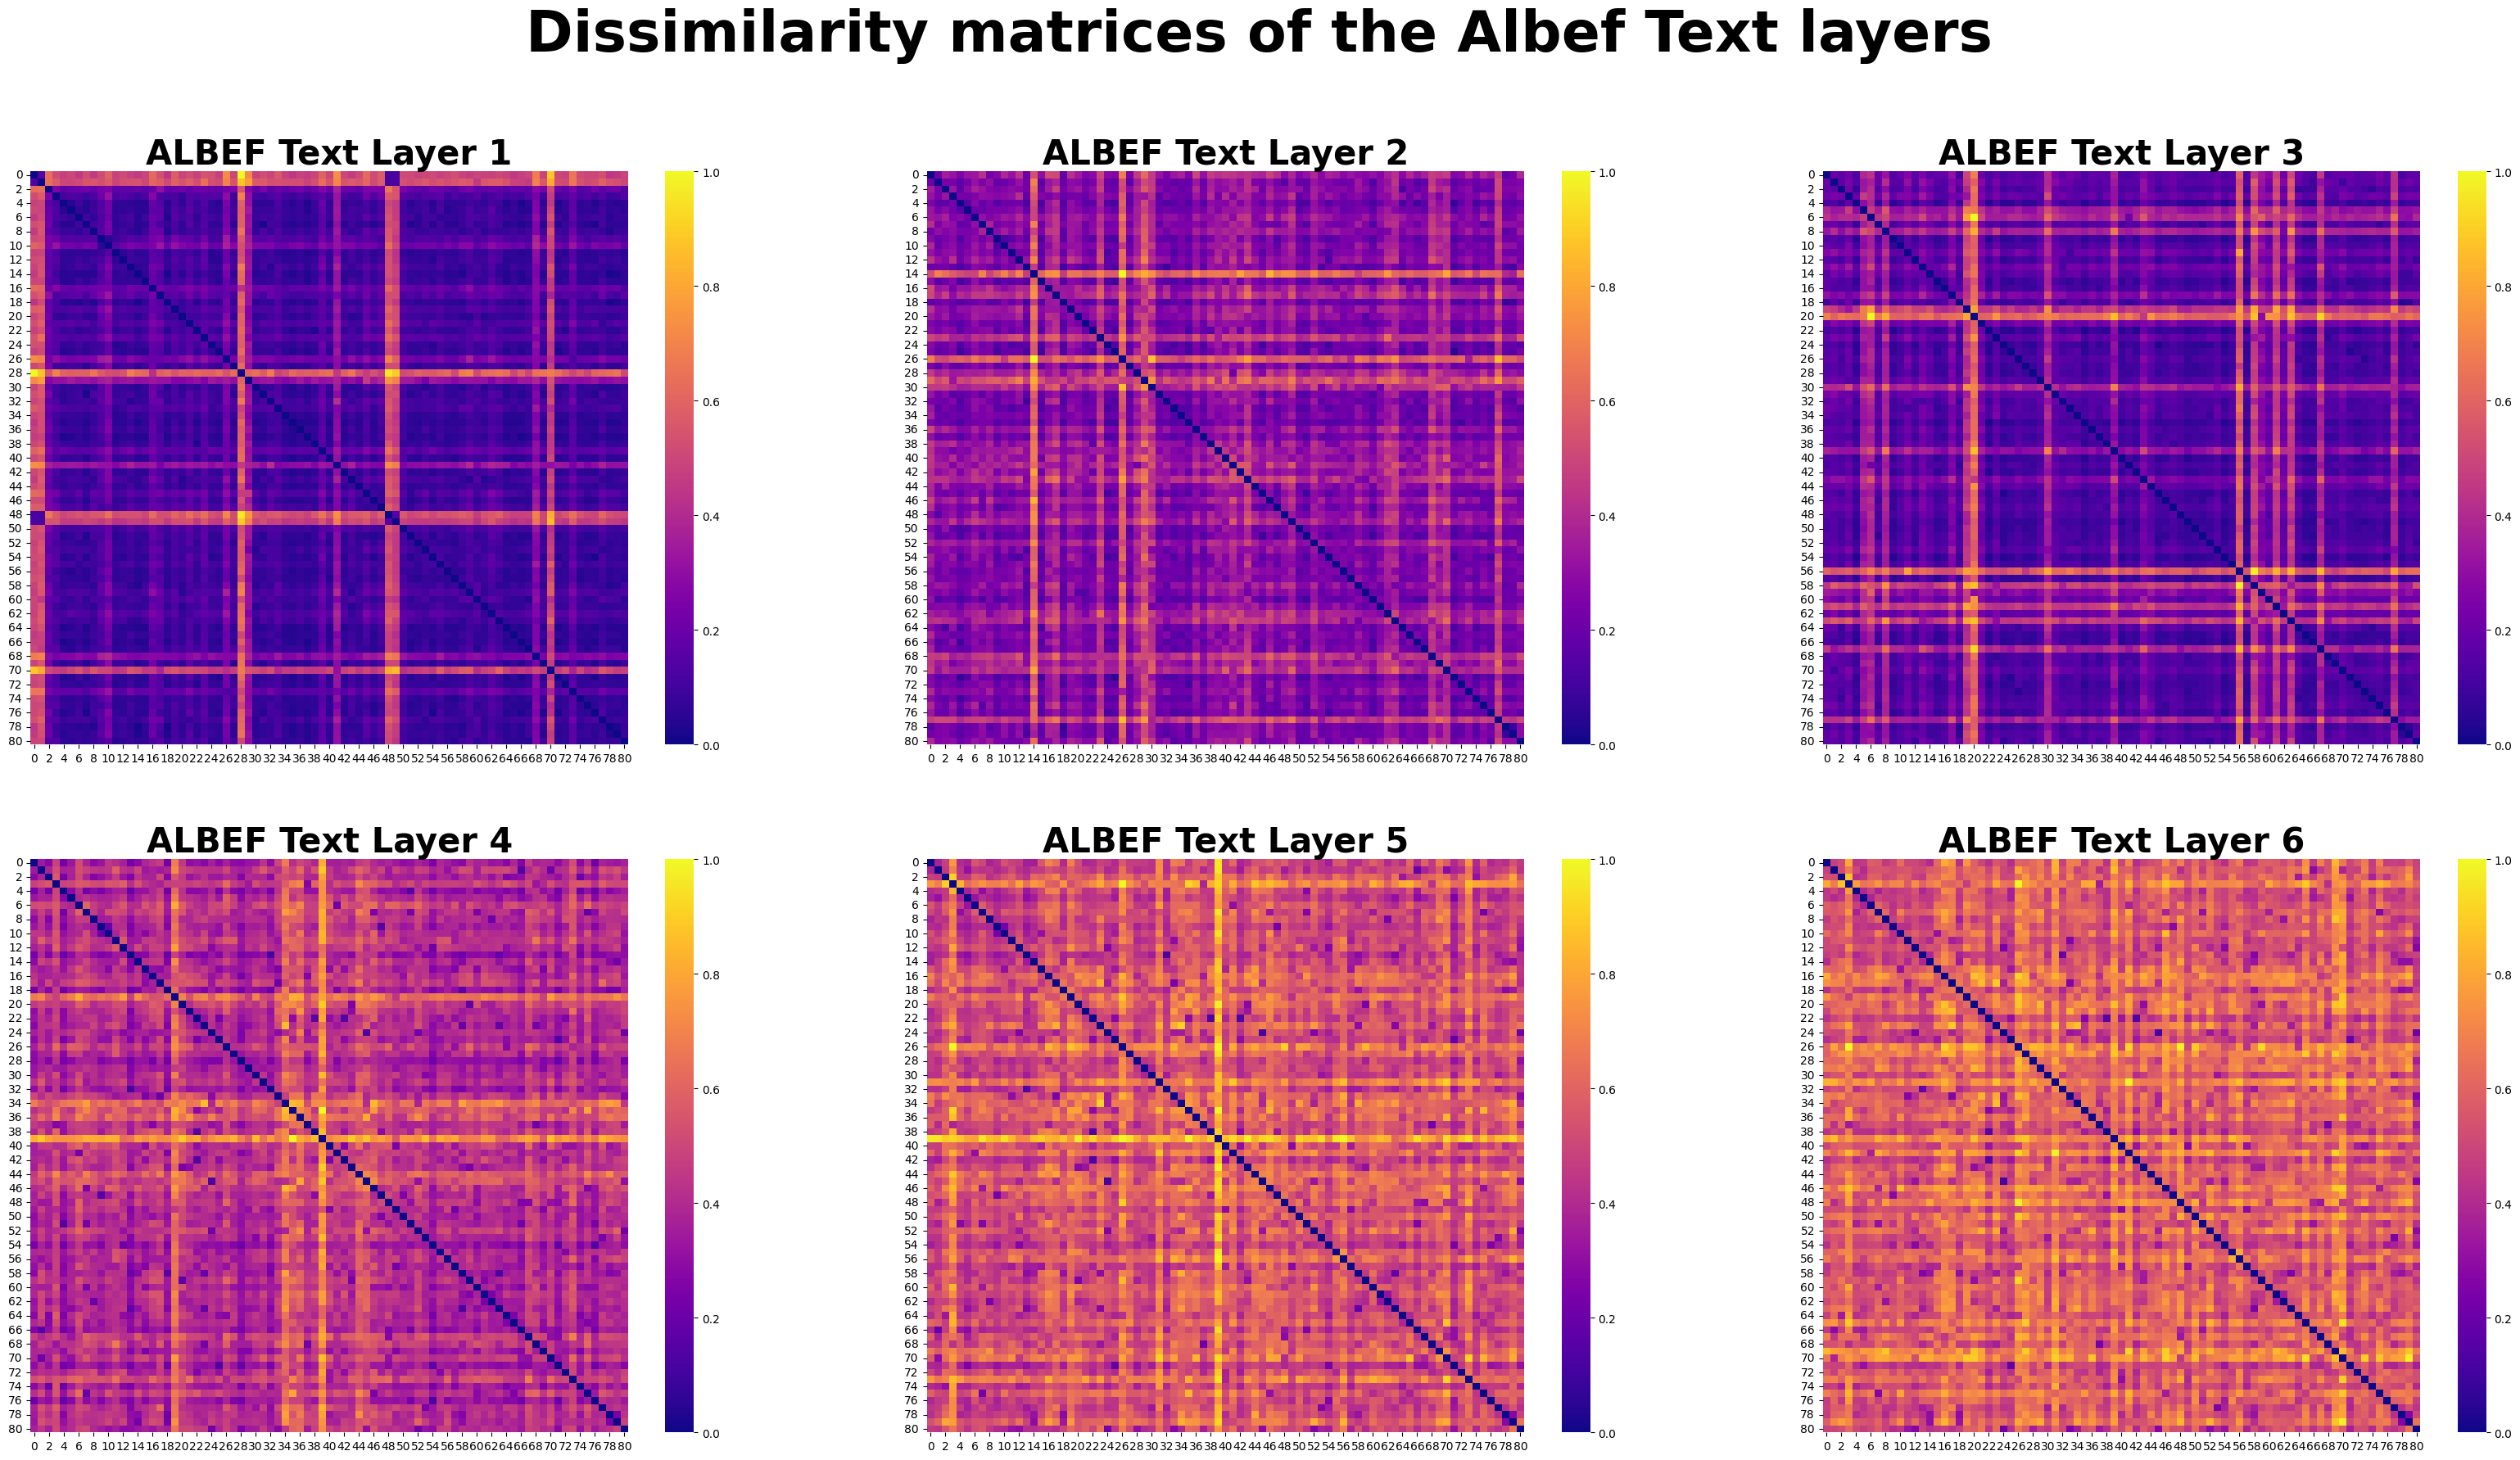

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(40,20))
fig.suptitle('Dissimilarity matrices of the Albef Text layers', fontsize=50, fontweight='bold')

plot_rdms(axs, salbef_txt_rdms)

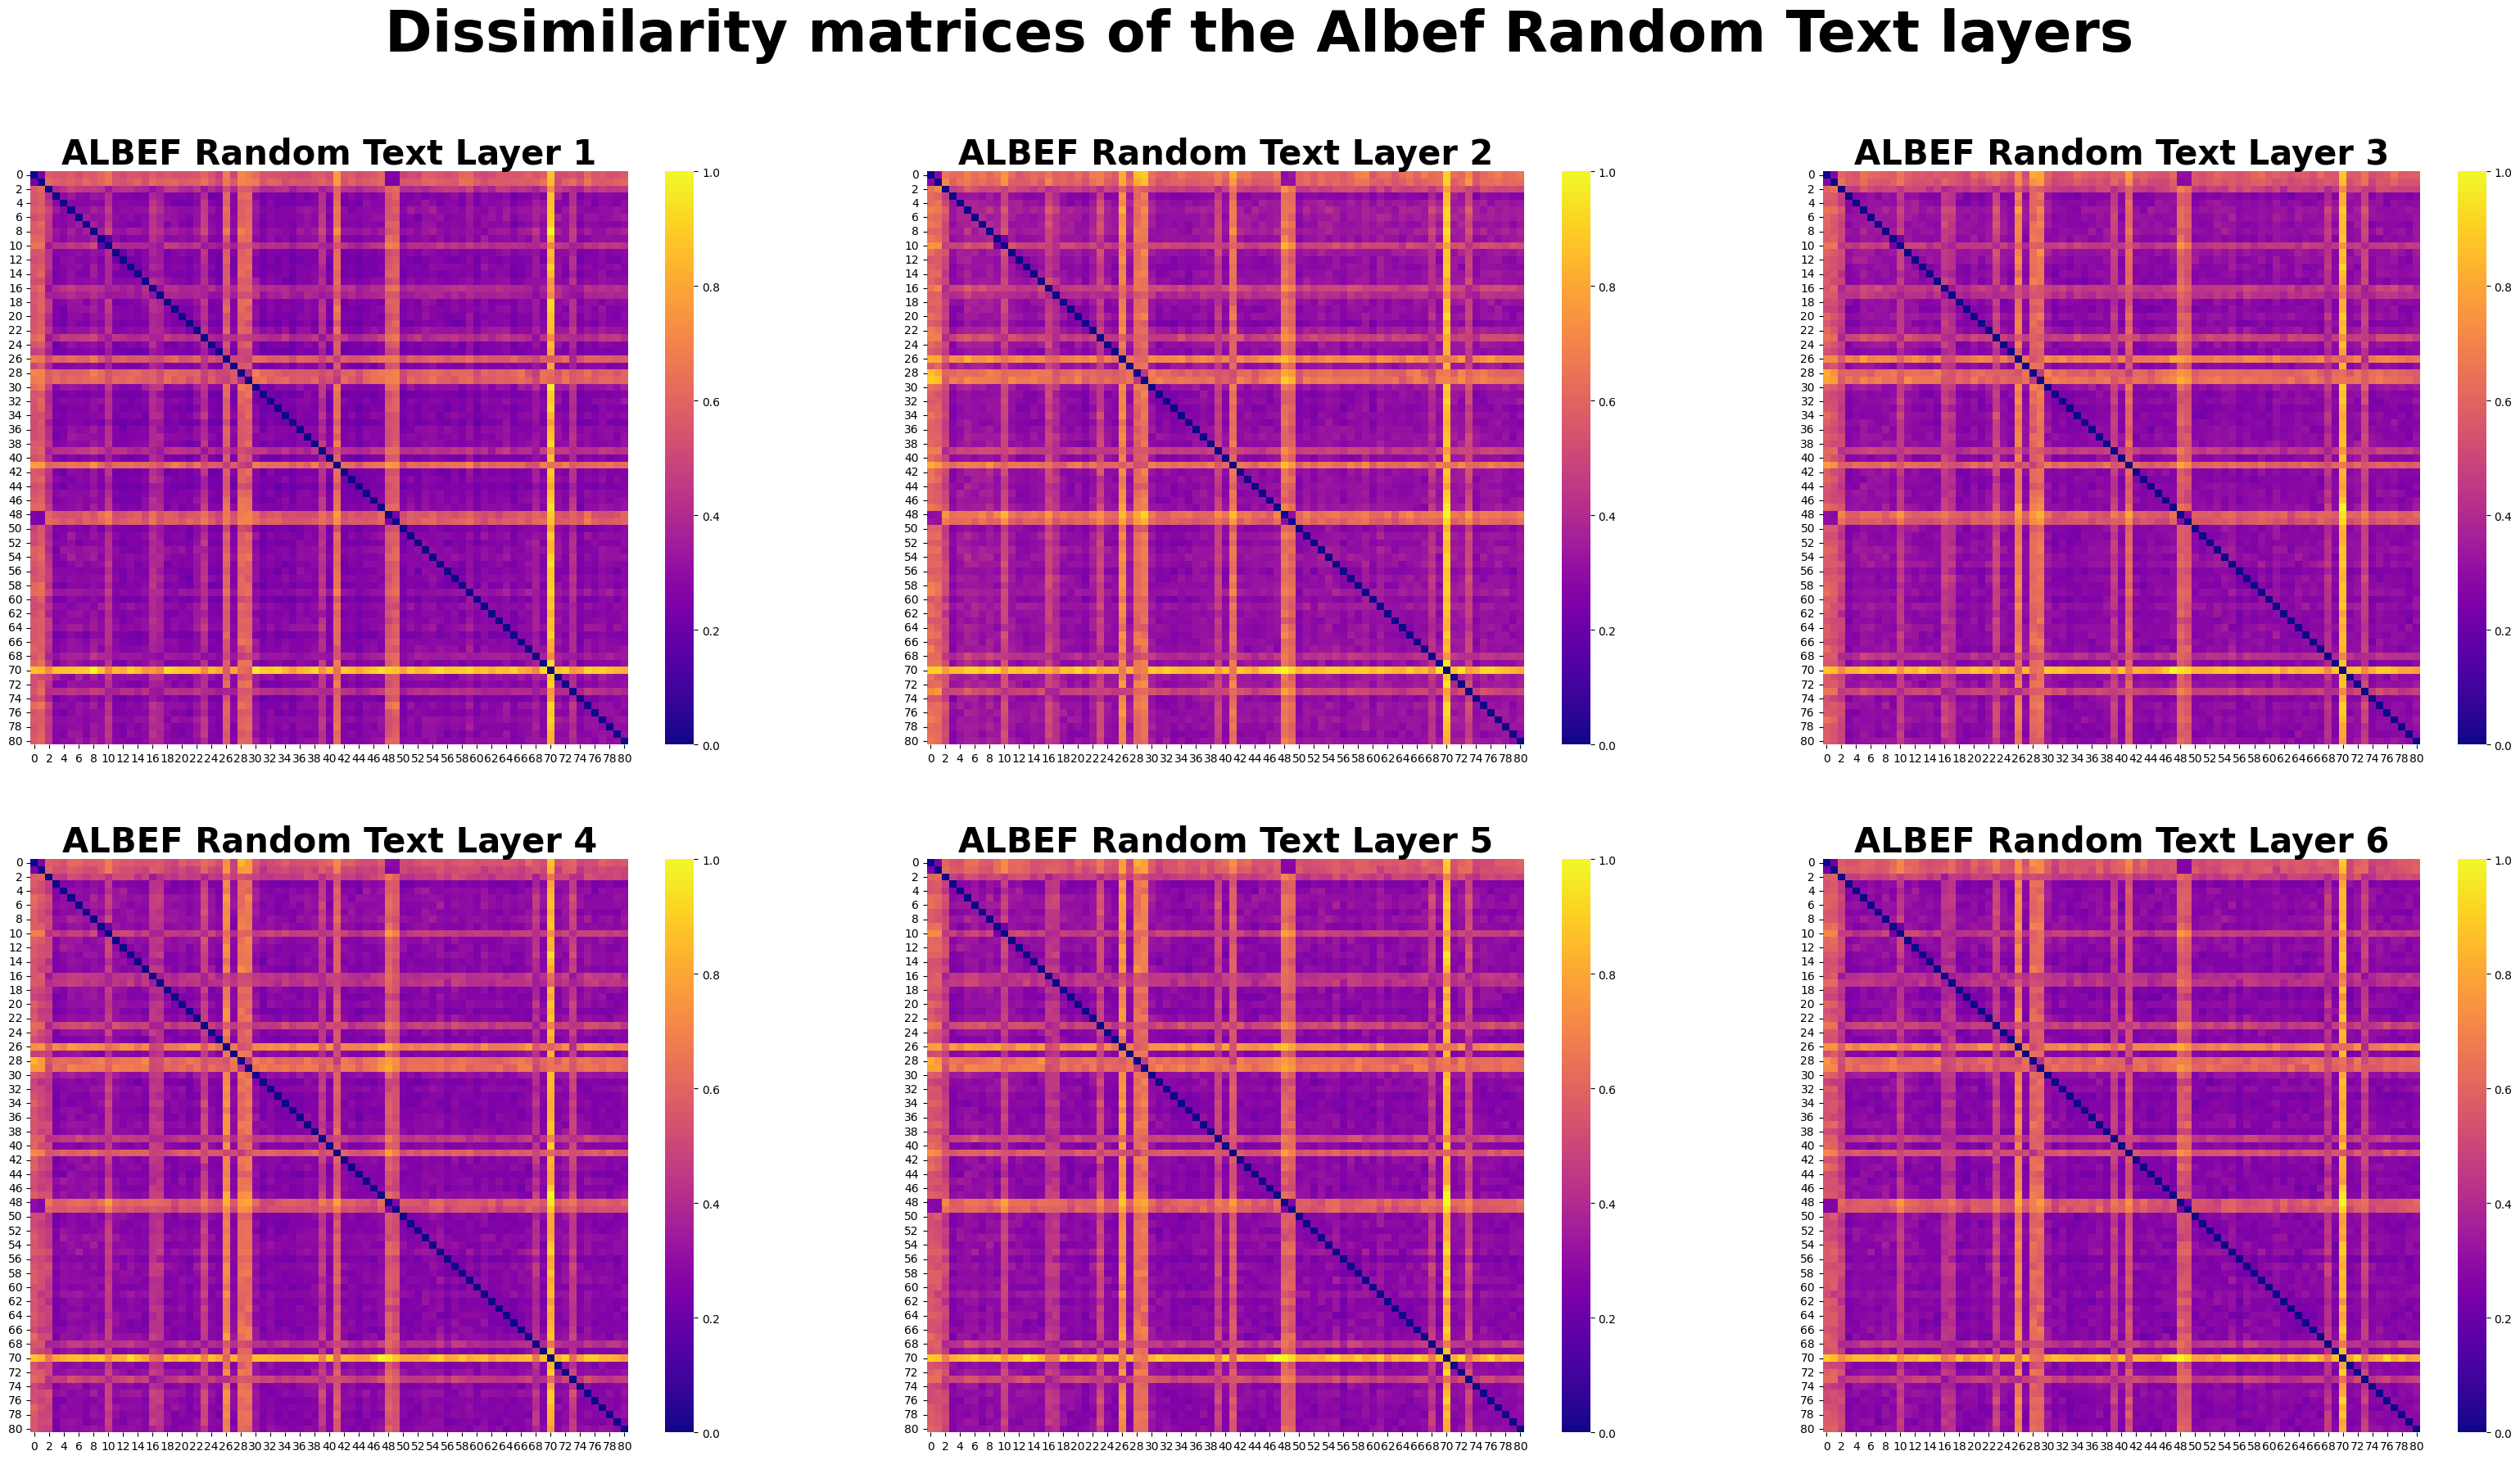

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(40,20))
fig.suptitle('Dissimilarity matrices of the Albef Random Text layers', fontsize=50, fontweight='bold')

plot_rdms(axs, salbef_random_txt_rdms)

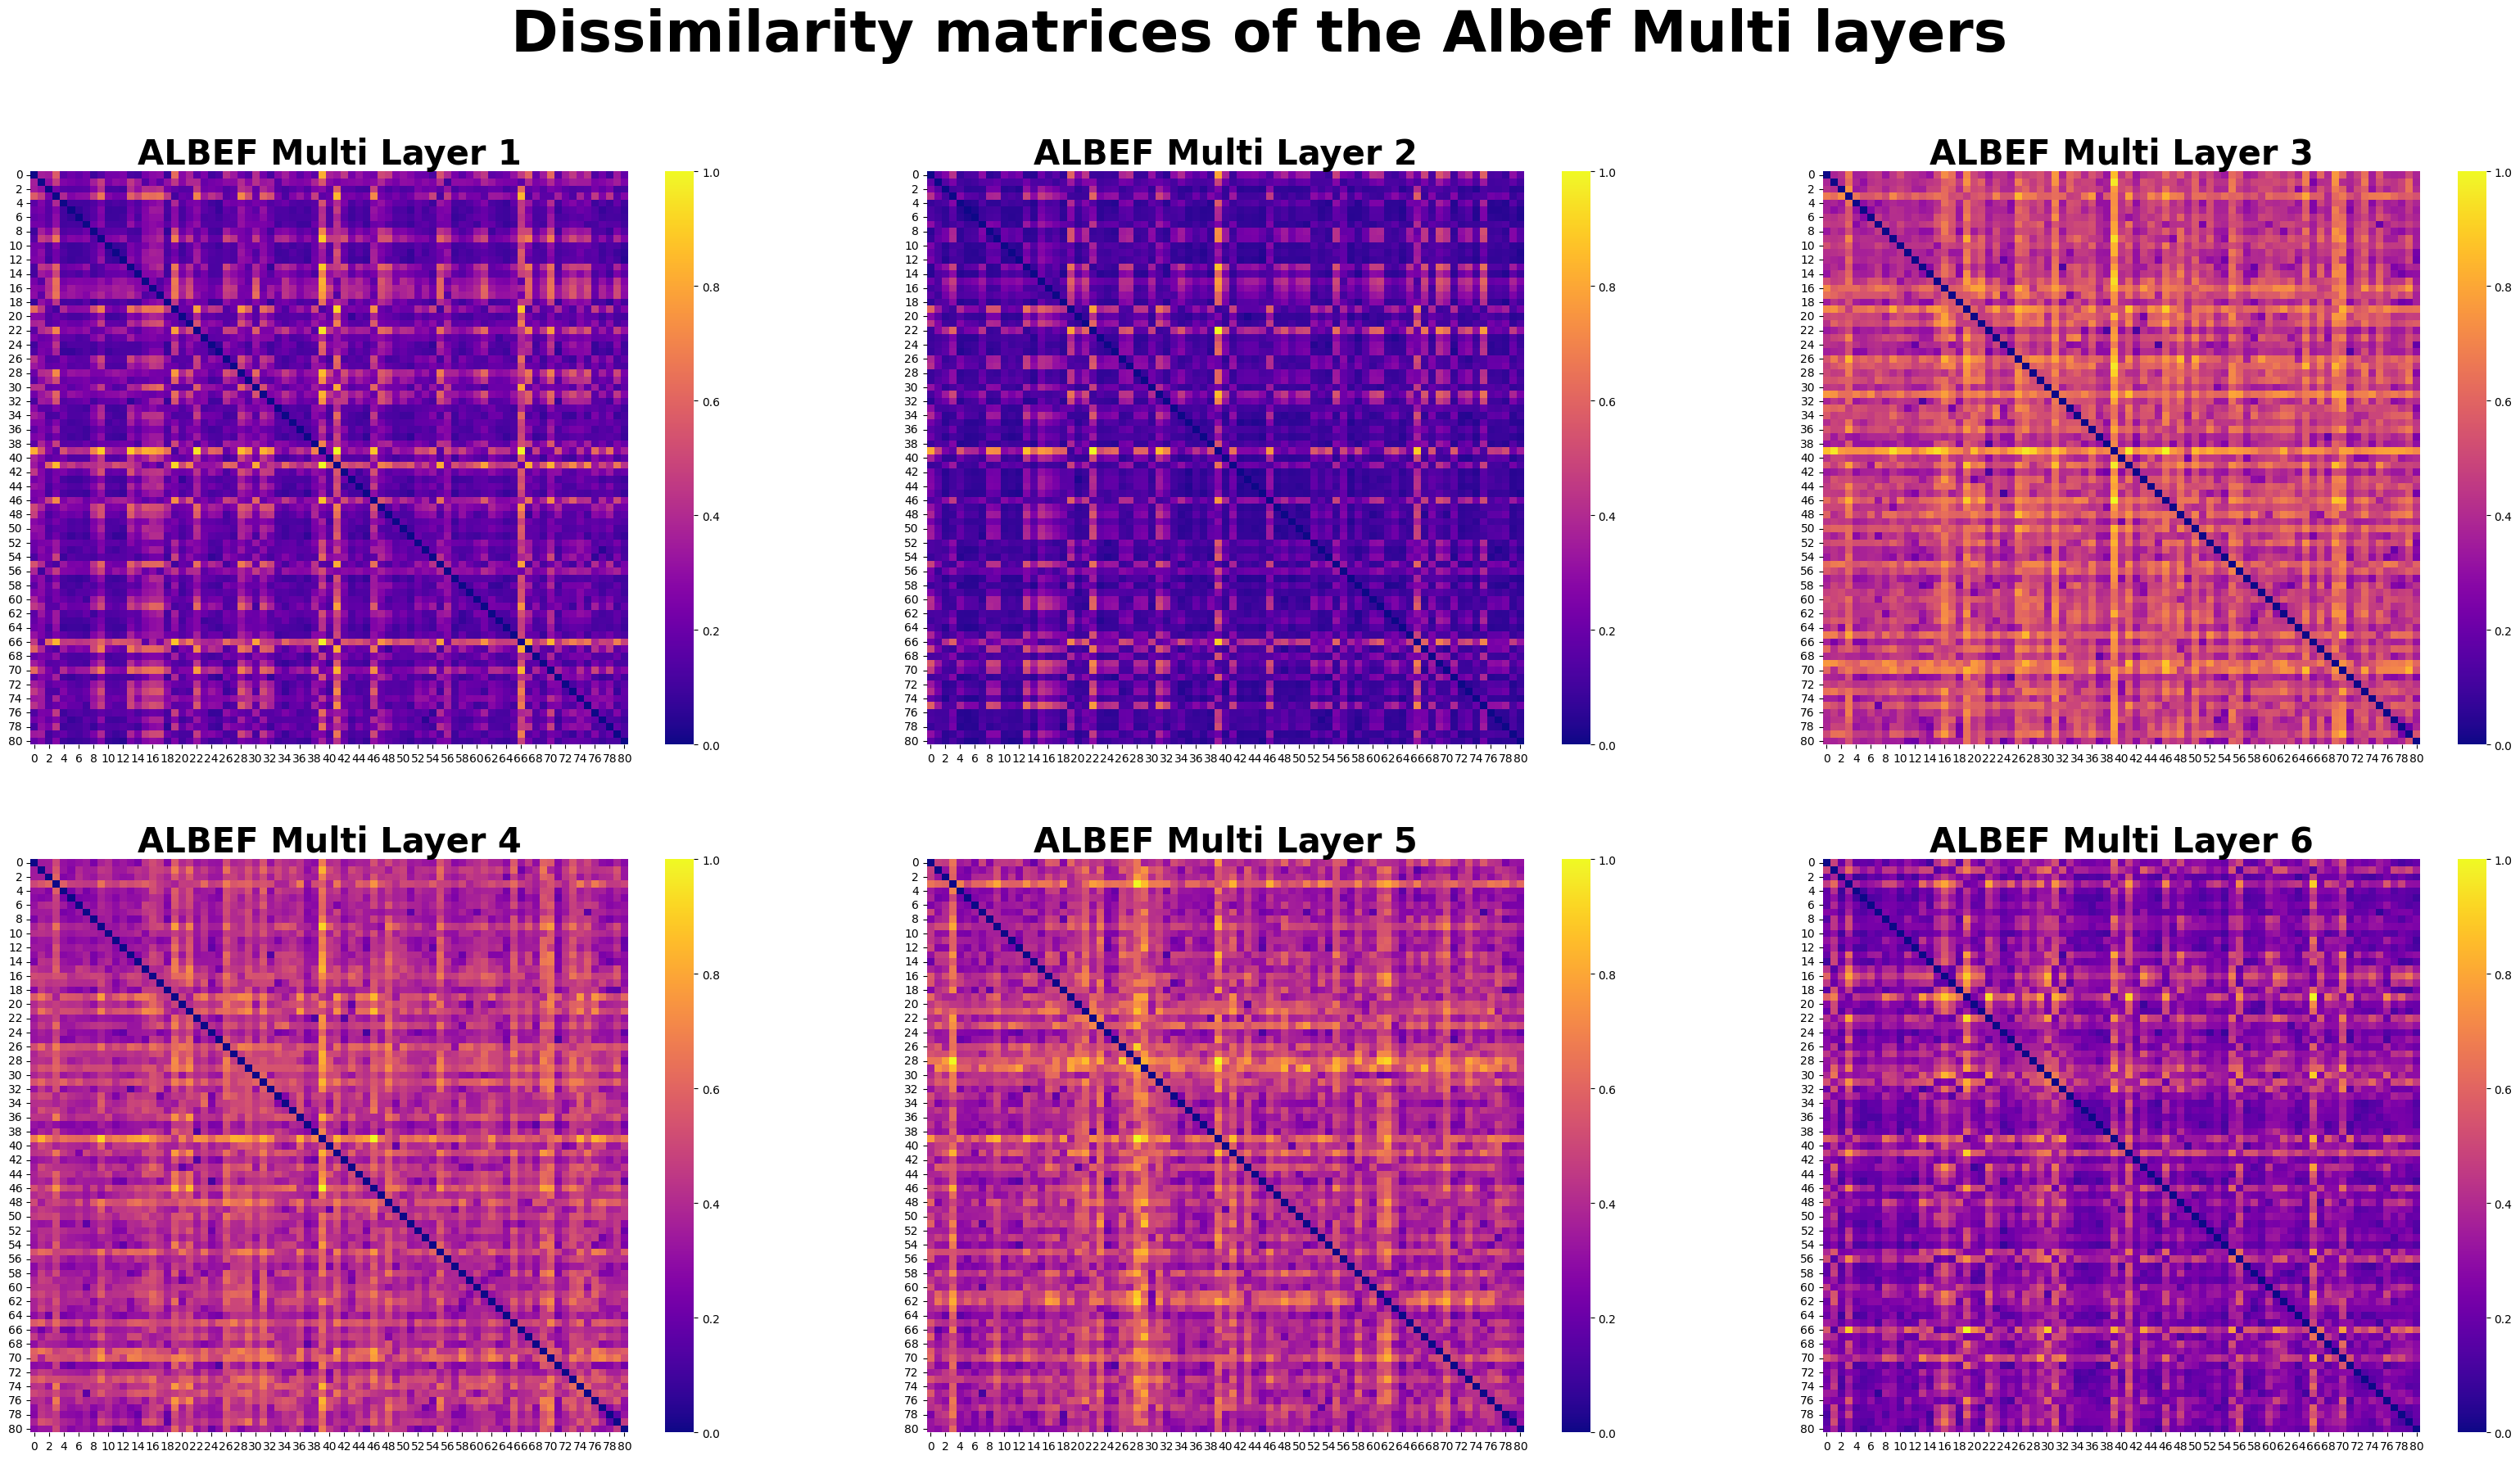

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(40,20))
fig.suptitle('Dissimilarity matrices of the Albef Multi layers', fontsize=50, fontweight='bold')

plot_rdms(axs, salbef_multi_rdms)

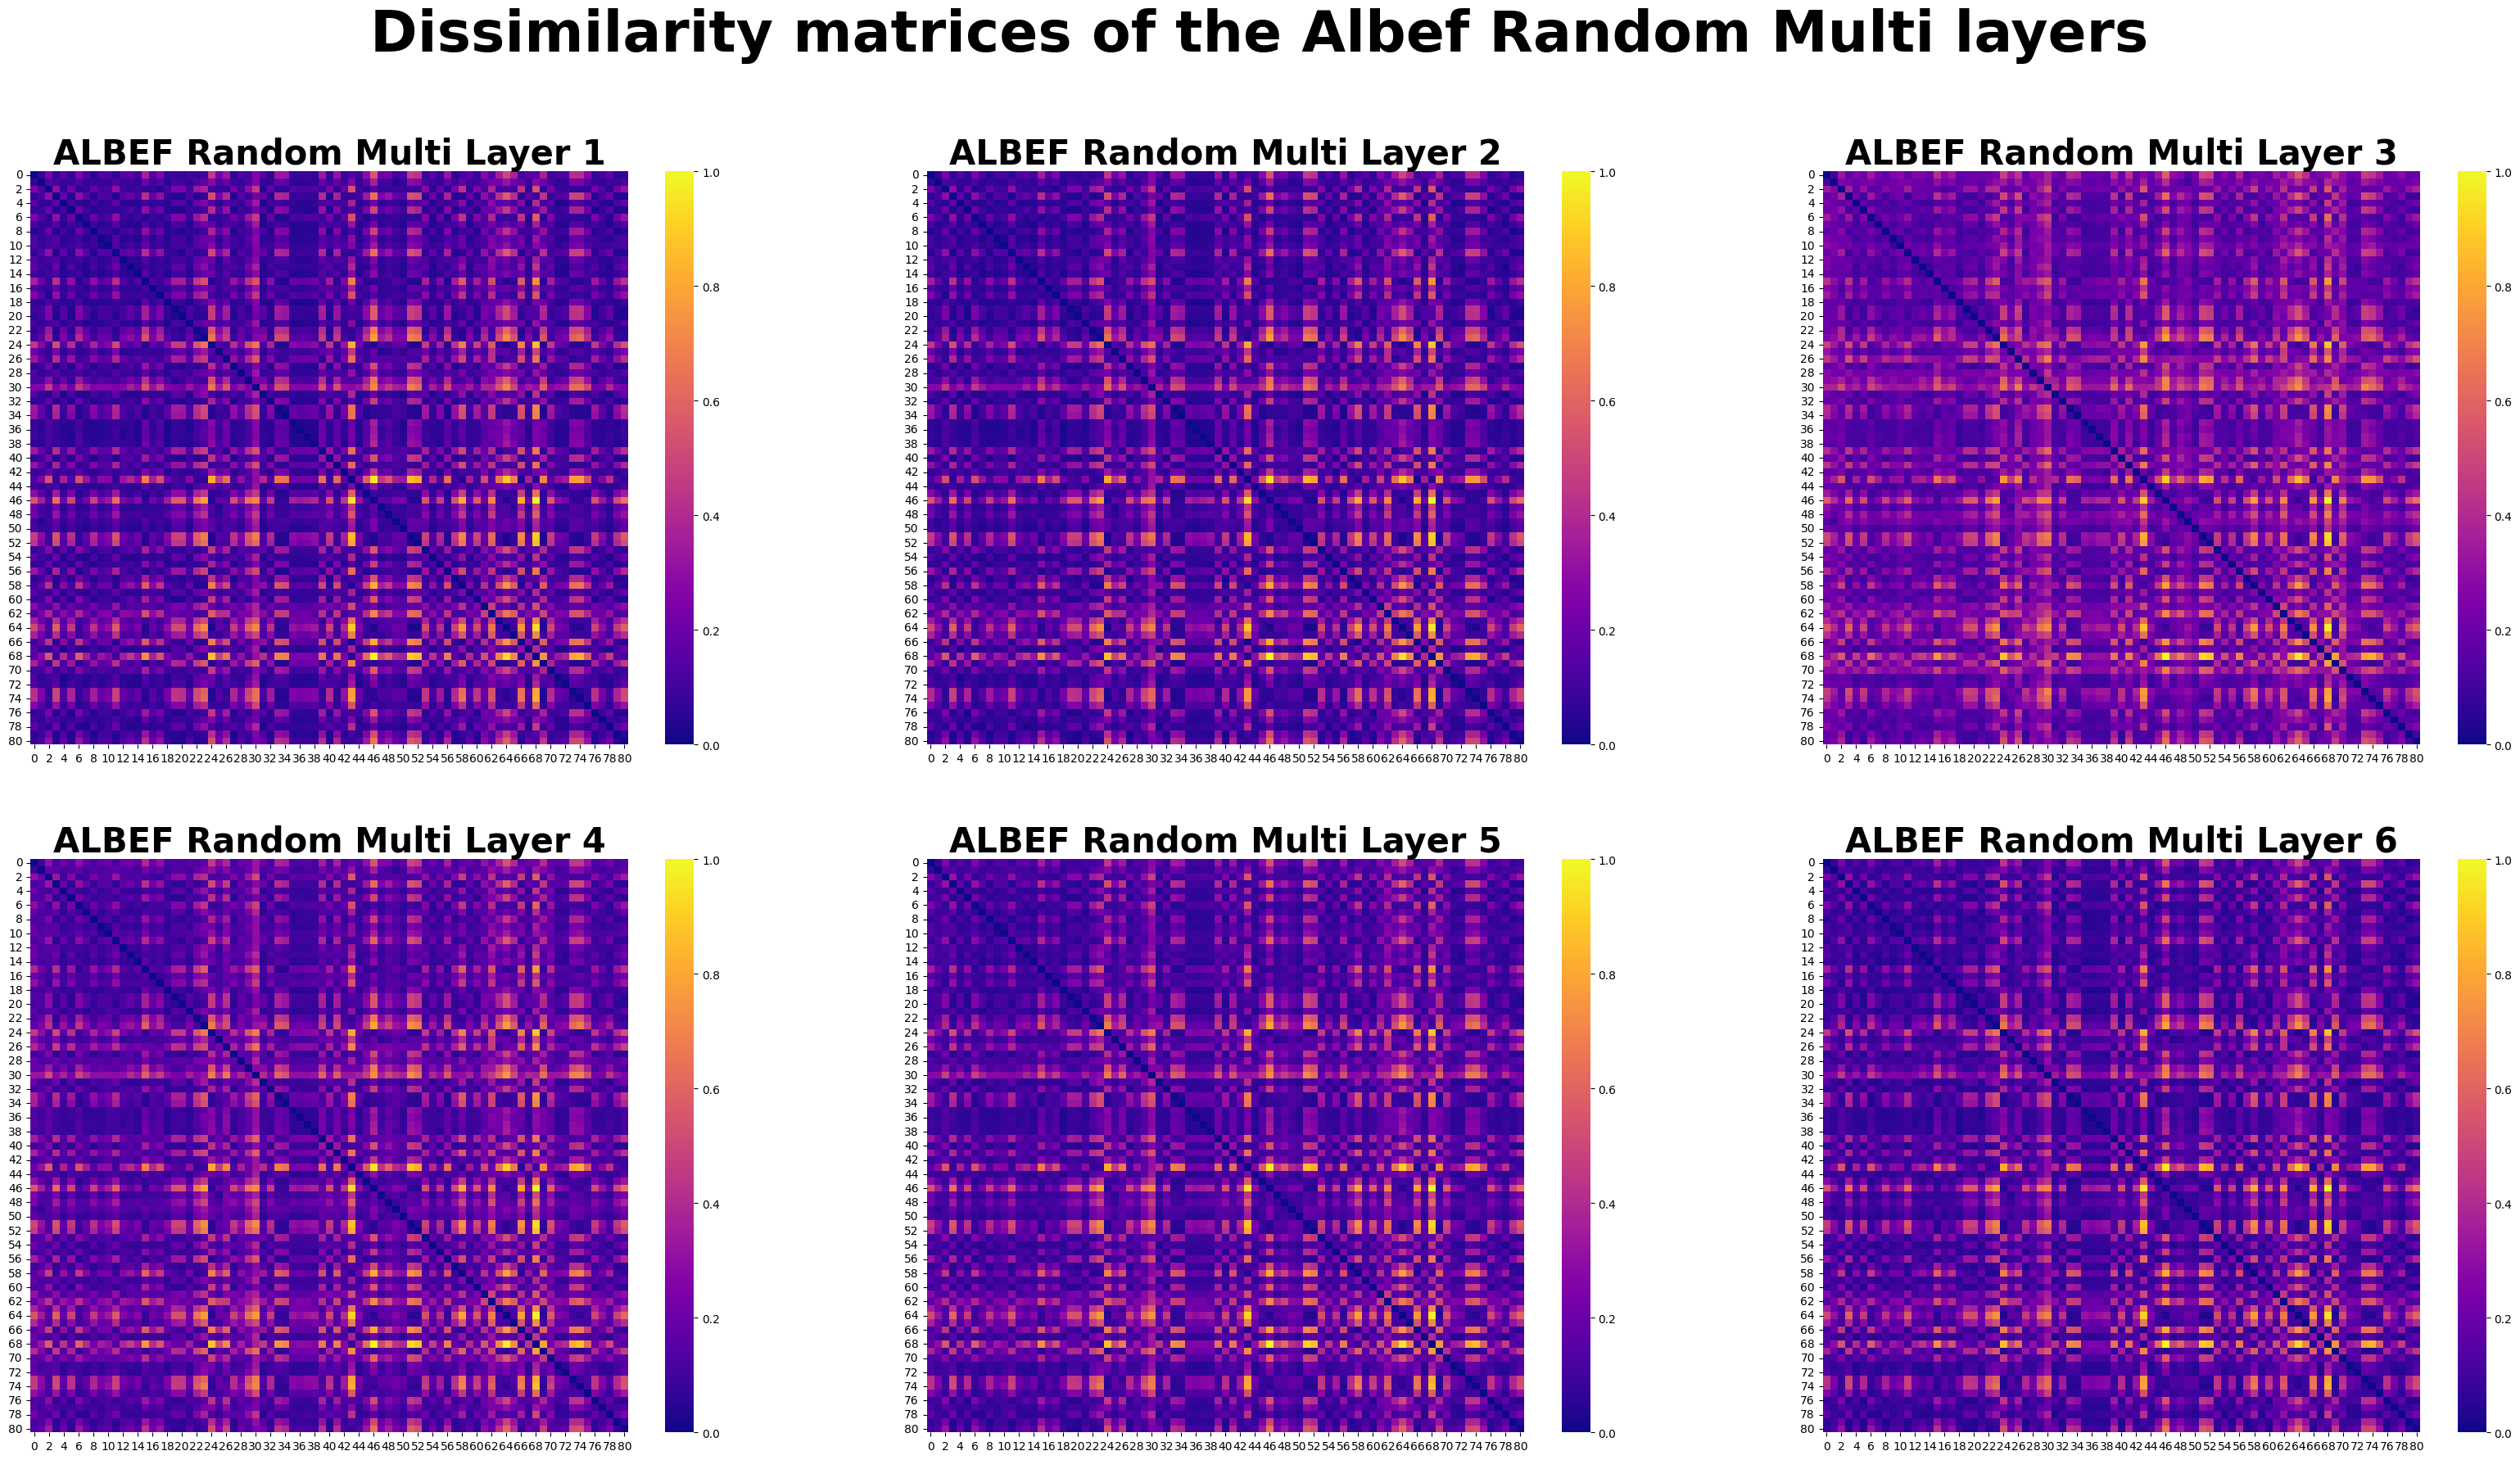

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(40,20))
fig.suptitle('Dissimilarity matrices of the Albef Random Multi layers', fontsize=50, fontweight='bold')

plot_rdms(axs, salbef_random_multi_rdms)

In [11]:
%store salbef_img_rdms
%store salbef_random_img_rdms
%store salbef_txt_rdms
%store salbef_random_txt_rdms
%store salbef_multi_rdms
%store salbef_random_multi_rdms

Stored 'salbef_img_rdms' (dict)
Stored 'salbef_random_img_rdms' (dict)
Stored 'salbef_txt_rdms' (dict)
Stored 'salbef_random_txt_rdms' (dict)
Stored 'salbef_multi_rdms' (dict)
Stored 'salbef_random_multi_rdms' (dict)


In [12]:
%store albef_img
%store albef_random_img
%store albef_txt
%store albef_random_txt
%store albef_multi
%store albef_random_multi

Stored 'albef_img' (Tensor)
Stored 'albef_random_img' (Tensor)
Stored 'albef_txt' (Tensor)
Stored 'albef_random_txt' (Tensor)
Stored 'albef_multi' (Tensor)
Stored 'albef_random_multi' (Tensor)
